In [ ]:
import gym
import numpy as np
import random as pr

In [45]:
env = gym.make("FrozenLake-v1", is_slippery=False)
Q = np.zeros((16,4))


In [59]:
limit_episode = 100000
Q = np.zeros((16,4))
def get_action(vector):
    m = np.max(vector)
    dice = np.where(vector==m)[0]
    return  pr.choice(dice)
reward_list=[]
    
for i in range(limit_episode):
    game_over = False
    state = env.reset()
    all_reward = 0

    while not game_over:
        action = np.argmax(Q[state,:]+np.random.randn(1,env.action_space.n)/(i+1))
        new_state, reward, game_over, _ = env.step(action)
        if new_state==state:
            continue
        Q[state, action] = reward + .9*np.max(Q[new_state])
        # Q[state,action] = reward*1.0 + np.max(Q[new_state,])
        state = new_state 
        all_reward+=reward
    reward_list.append(all_reward)
for i in range(4):
    for j in range(4):
        print(Q[i*4+j,:],end=",")
    print()


[0.      0.59049 0.      0.     ],[0. 0. 0. 0.],[0.    0.729 0.    0.   ],[0. 0. 0. 0.],
[0.     0.6561 0.     0.    ],[0. 0. 0. 0.],[0.   0.81 0.   0.  ],[0. 0. 0. 0.],
[0.    0.    0.729 0.   ],[0.   0.81 0.   0.  ],[0.  0.9 0.  0. ],[0. 0. 0. 0.],
[0. 0. 0. 0.],[0.  0.  0.9 0. ],[0. 0. 1. 0.],[0. 0. 0. 0.],


<BarContainer object of 1000 artists>

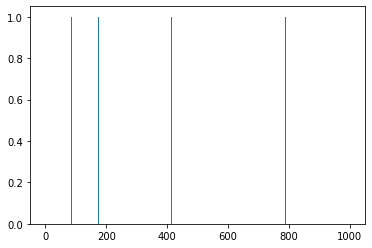

In [41]:
import matplotlib.pyplot as plt

plt.bar(np.arange(limit_episode),reward_list)

# state = env.reset()
# while True:
#     env.render()
#     action = rargmax(Q[state])
#     new_state, reward, done, _ = env.step(action)
#     state = new_state
#     if done:
#         env.render()
#         break
#         env.close()
#     state = new_state
# env.close()